In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/train_data_Loan Approval System.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/test_data_Loan Approval System.csv')
train_original = train.copy()
test_original = test.copy()

In [5]:
print('train data: ',train.shape,'& test data: ',test.shape)

train data:  (614, 13) & test data:  (367, 12)


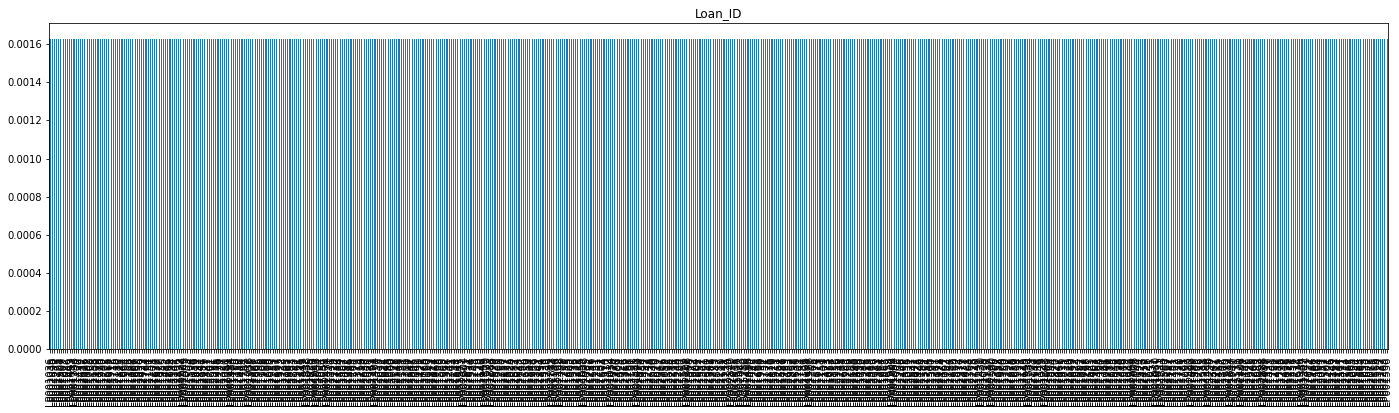

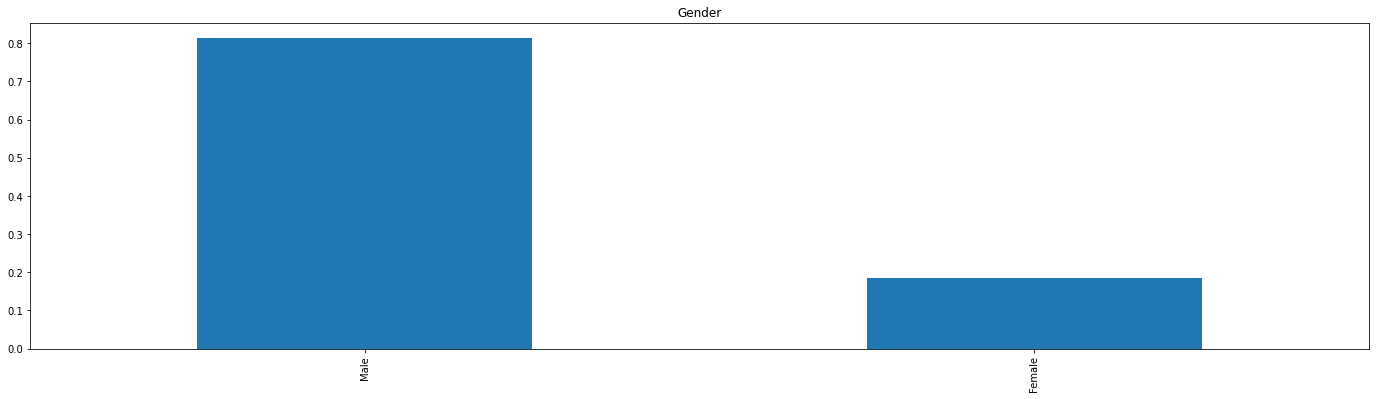

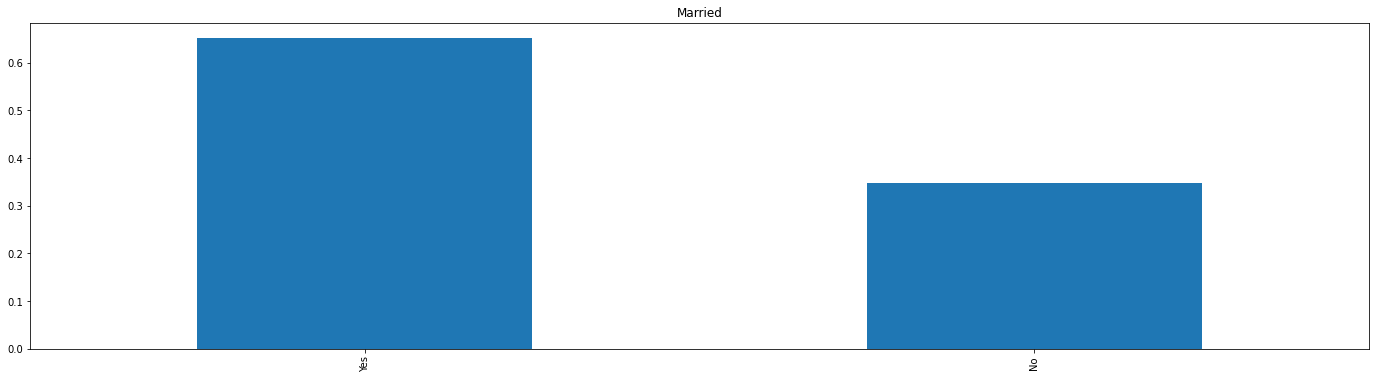

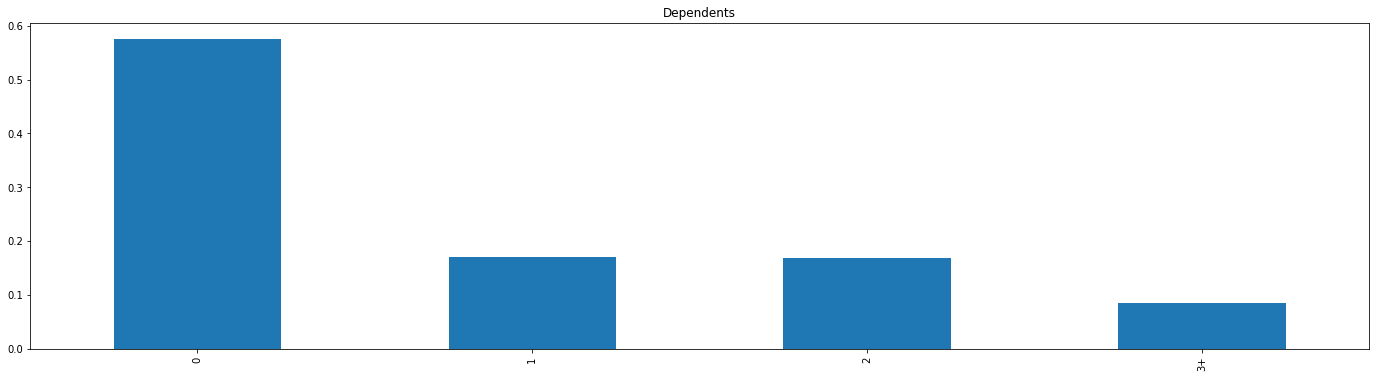

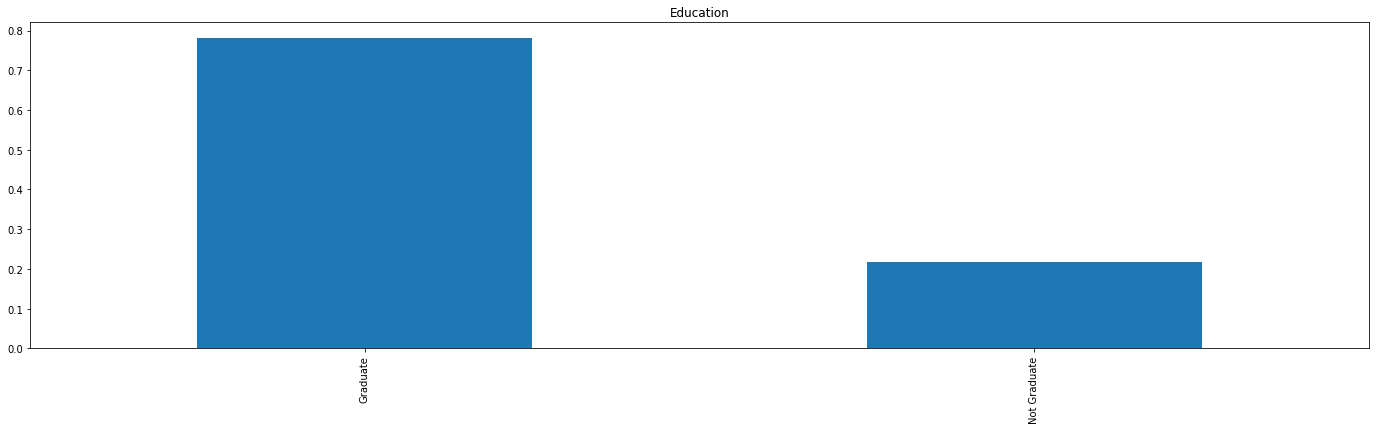

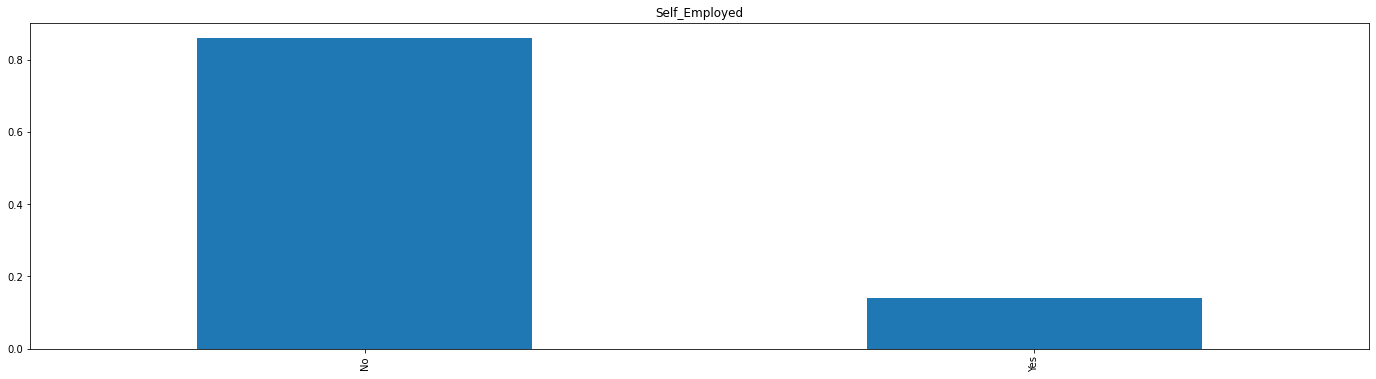

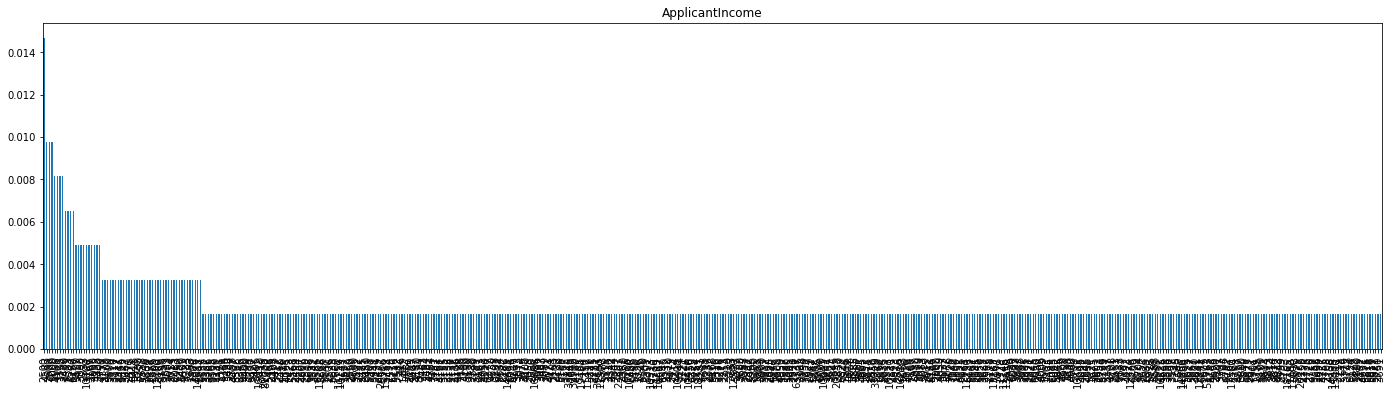

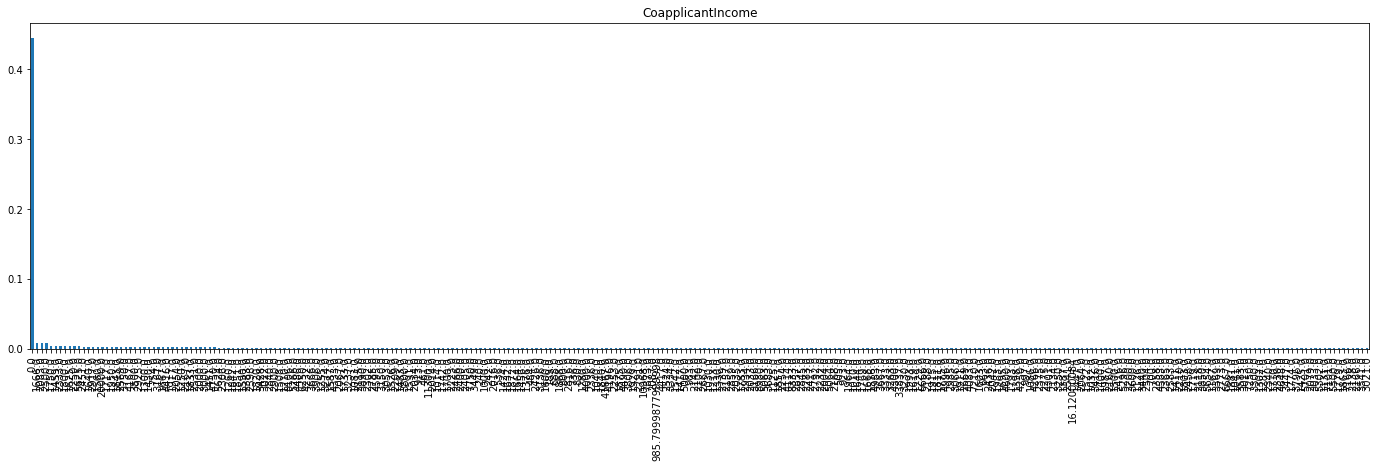

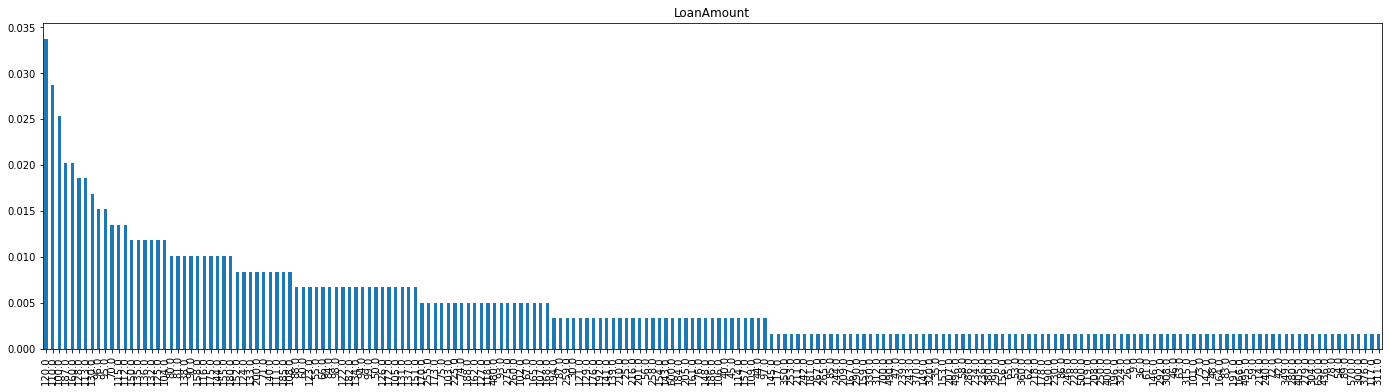

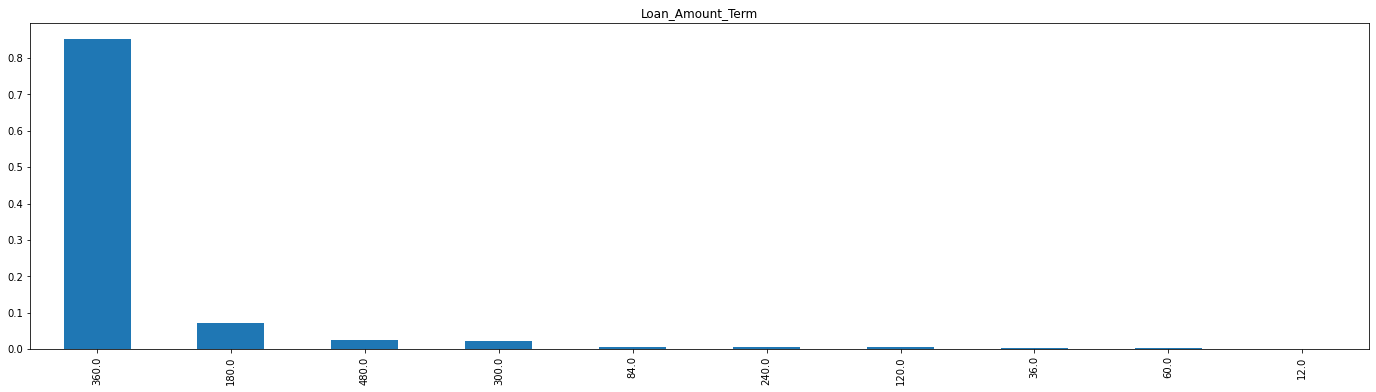

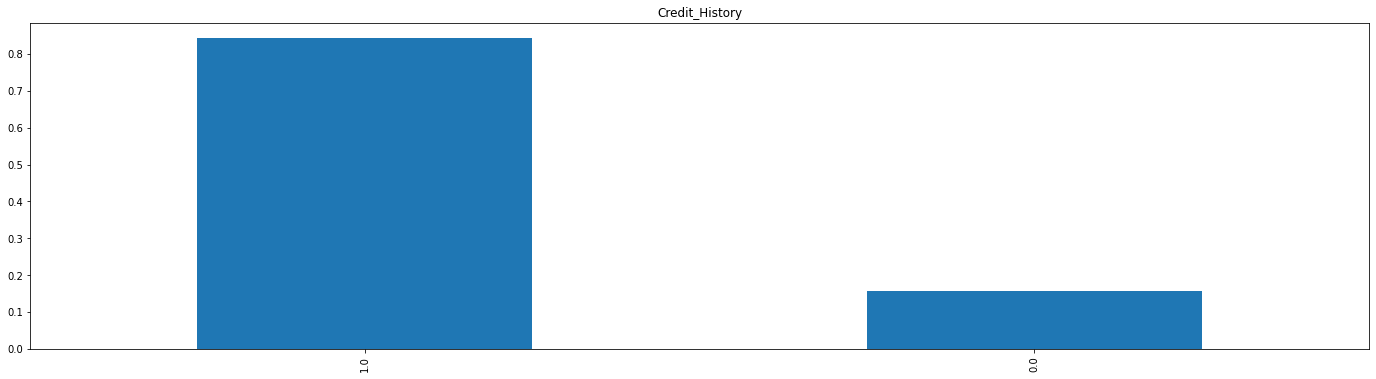

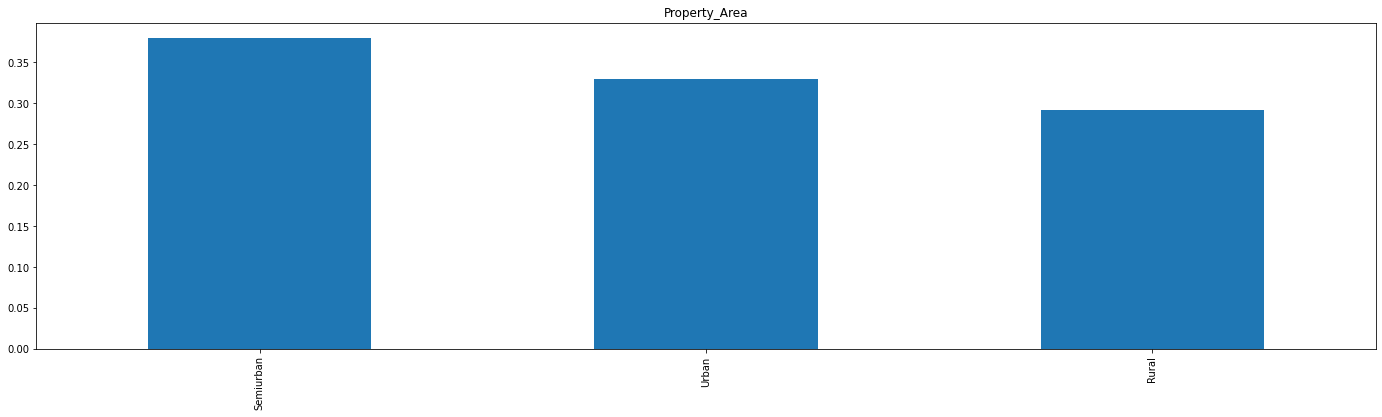

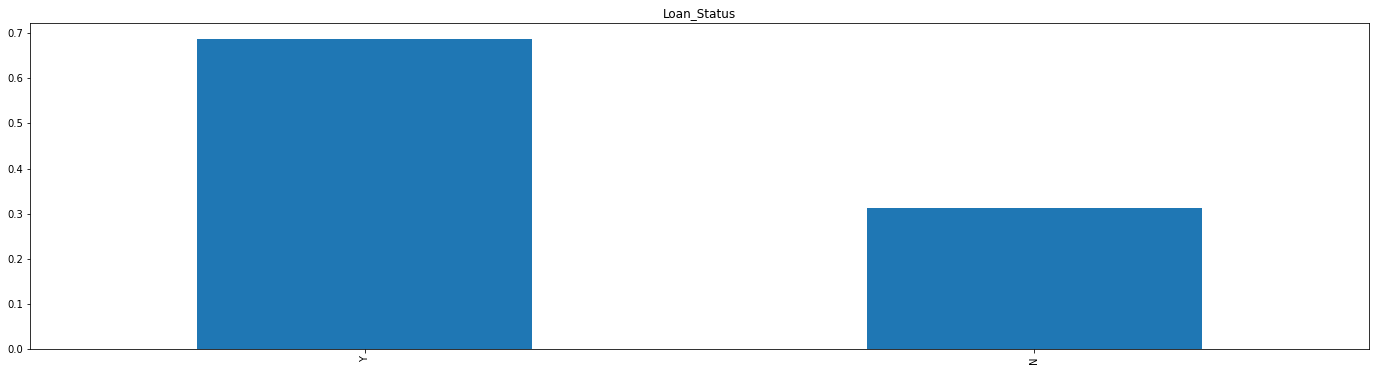

In [7]:
for current_column in train.columns:
    #if(train[current_column].dtype == 'object'):
        train[current_column].value_counts(normalize=True).plot.bar(figsize=(24,6),title=current_column)
        plt.show()
        plt.close()

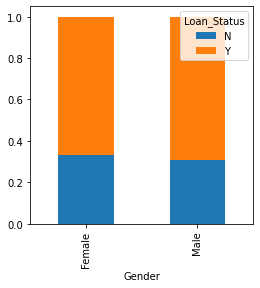

In [8]:
gender = pd.crosstab(train['Gender'],train['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

In [9]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [55]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [57]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [13]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6853823d0>,
      dtype=object)

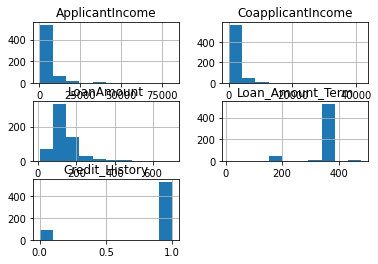

In [ ]:
train.hist()

In [58]:
train =  train.drop('Loan_ID',axis=1)
test =  test.drop('Loan_ID',axis=1)

In [59]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [60]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=0.3)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [63]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
pred_cv = model.predict(x_cv)

In [65]:
accuracy_score(y_cv,pred_cv)

0.8324324324324325

In [66]:
pred_test = model.predict(test)

In [67]:
from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('{} of k-fold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test= model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score:',score)
    i+=1
    pred_test = model.predict(test)
    pred_LR= model.predict_proba(xvl)[:,1]

1 of k-fold 5
accuracy_score: 0.8048780487804879
2 of k-fold 5
accuracy_score: 0.8373983739837398
3 of k-fold 5
accuracy_score: 0.7967479674796748
4 of k-fold 5
accuracy_score: 0.8211382113821138
5 of k-fold 5
accuracy_score: 0.8032786885245902


**Feature engineering**

In [68]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']

In [69]:
train['Total_Income_Log']=np.log(train['Total_Income'])
test['Total_Income_Log']=np.log(test['Total_Income'])

In [70]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

In [71]:
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)

In [72]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

**Decision Tree**

In [73]:
from sklearn import tree
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('{} of k-fold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test= model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score:',score)
    i+=1
    pred_test = model.predict(test)
    pred_DT= model.predict_proba(xvl)[:,1]

submission['Loan_Status'] = pred_test
submission['Loan_ID']= test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('/content/drive/MyDrive/Colab Notebooks/Submissions/H AV Loan Approver/20210310_LAS_Decistion_Tree_Submission.csv')

1 of k-fold 5
accuracy_score: 0.7073170731707317
2 of k-fold 5
accuracy_score: 0.6991869918699187
3 of k-fold 5
accuracy_score: 0.7154471544715447
4 of k-fold 5
accuracy_score: 0.7235772357723578
5 of k-fold 5
accuracy_score: 0.680327868852459


In [74]:
from sklearn.ensemble import RandomForestClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('{} of k-fold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test= model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score:',score)
    i+=1
    pred_test = model.predict(test)
    pred_RF= model.predict_proba(xvl)[:,1]

submission['Loan_Status'] = pred_test
submission['Loan_ID']= test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('/content/drive/MyDrive/Colab Notebooks/Submissions/H AV Loan Approver/20210310_LAS_Random_Forest_Submission.csv')

1 of k-fold 5
accuracy_score: 0.8211382113821138
2 of k-fold 5
accuracy_score: 0.8211382113821138
3 of k-fold 5
accuracy_score: 0.7804878048780488
4 of k-fold 5
accuracy_score: 0.7967479674796748
5 of k-fold 5
accuracy_score: 0.7213114754098361


**Grid Search CV**

In [ ]:
from sklearn.model_selection import GridSearchCV
paramgrid={
    'max_depth':list(range(1,20,2)),
    'n_estimators':list(range(1,200,20))
    }
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)
grid_search.fit(x_train,y_train)
GridSearchCV(
    cv=None,error_score='raise',estimator=RandomForestClassifier(
        bootstrap=True,class_weight=None,criterion='gini',max_depth=None,max_features='auto',
        max_leaf_nodes=None,min_impurity_split=None,min_samples_leaf=1,
        min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=10,
        n_jobs=1,oob_score=False,random_state=1,verbose=0,warm_start=False),iid=True,n_jobs=1,    param_grid={'max_depth':[1,3,5,7,9,11,13,15,17,19],'n_estimators':[1,21,41,61,81,101,121,141,161,181]},pre_dispatch='2*n_jobs',refit=True,return_train_score='warn',scoring=None,verbose=0)
grid_search.best_estimator_
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',            max_depth=3, max_features='auto', max_leaf_nodes=None,            min_impurity_decrease=0.0, min_impurity_split=None,            min_samples_leaf=1, min_samples_split=2,            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('{} of k-fold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1,max_depth=3,n_estimators=41)
    model.fit(xtr,ytr)
    pred_test= model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score:',score)
    i+=1
    pred_test = model.predict(test)
    pred_RF_GS= model.predict_proba(xvl)[:,1]

submission['Loan_Status'] = pred_test
submission['Loan_ID']= test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('/content/drive/MyDrive/Colab Notebooks/Submissions/H AV Loan Approver/20210310_LAS_Random_Forest_Submission_With_GS.csv')

**XG Boost Classifier**

In [53]:
from xgboost import XGBClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('{} of k-fold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = XGBClassifier(n_estimators=50,max_depth=4)
    model.fit(xtr,ytr)
    pred_test= model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score:',score)
    i+=1
    pred_test = model.predict(test)
    pred_XGB= model.predict_proba(test)[:,1]

submission['Loan_Status'] = pred_test
submission['Loan_ID']= test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('/content/drive/MyDrive/Colab Notebooks/Submissions/H AV Loan Approver/20210310_LAS_XGB.csv')

1 of k-fold 5
accuracy_score: 0.8048780487804879


ValueError: ignored

In [ ]:
submission = pd.read_csv('/content/sample_submission__Loan Approval System.csv')
submission['Loan_Status'] = pred_test
submission['Loan_ID']= test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('/content/drive/MyDrive/Colab Notebooks/Submissions/AV/Loan_Approver/LAS_10March2021_Submission.csv')